importing necessary librarys


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dropout


Using TensorFlow backend.


**from optdigits.name doc it is evident that the last attribute(65th) is the class label.**



In [2]:

traindata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


In [3]:

testdata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


**seperating data from labels**

In [0]:
traintargets=traindata.loc[:,64]
traindata=traindata.iloc[:,0:-1]


In [0]:
testtargets=testdata.loc[:,64]
testdata=testdata.iloc[:,0:-1]



In [0]:
x_train = np.array(traindata)


In [0]:
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras import losses


creating a neural net

In [8]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(200, activation = "relu", input_shape=(x_train[0].shape)))

# Hidden - Layers
model.add(layers.Dense(150, activation = "sigmoid"))
#model.add(layers.Dense(100, activation = "sigmoid"))
#model.add(layers.Dense(200, activation = "sigmoid"))
# model.add(layers.Dense(300, activation = "sigmoid"))
# model.add(layers.Dense(300, activation = "sigmoid"))
# model.add(layers.Dense(300, activation = "sigmoid"))

#model.add(layers.Dense(50, activation = "sigmoid"))

# Output- Layer
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

W0709 03:48:47.879182 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 03:48:47.921758 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 03:48:47.930059 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               13000     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 44,660
Trainable params: 44,660
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
             metrics=['accuracy'])

W0709 03:48:47.997418 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 03:48:48.022335 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(traintargets)
test_labels = to_categorical(testtargets)

In [11]:
checkpointer = ModelCheckpoint(filepath='tm_exp3a.hdf5',verbose=2, save_best_only=True)

history=model.fit(x_train,train_labels,epochs=50,verbose=2,callbacks=[checkpointer],validation_split=0.2)


W0709 03:48:48.215210 140102162397056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 03:48:48.293436 140102162397056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3058 samples, validate on 765 samples
Epoch 1/50
 - 1s - loss: 0.7106 - acc: 0.8483 - val_loss: 0.2481 - val_acc: 0.9595

Epoch 00001: val_loss improved from inf to 0.24808, saving model to tm_exp3a.hdf5
Epoch 2/50
 - 0s - loss: 0.1704 - acc: 0.9653 - val_loss: 0.1467 - val_acc: 0.9660


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:118: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_loss improved from 0.24808 to 0.14667, saving model to tm_exp3a.hdf5
Epoch 3/50
 - 0s - loss: 0.1072 - acc: 0.9755 - val_loss: 0.1083 - val_acc: 0.9739

Epoch 00003: val_loss improved from 0.14667 to 0.10834, saving model to tm_exp3a.hdf5
Epoch 4/50
 - 0s - loss: 0.0767 - acc: 0.9823 - val_loss: 0.0896 - val_acc: 0.9817

Epoch 00004: val_loss improved from 0.10834 to 0.08963, saving model to tm_exp3a.hdf5
Epoch 5/50
 - 0s - loss: 0.0531 - acc: 0.9882 - val_loss: 0.0834 - val_acc: 0.9752

Epoch 00005: val_loss improved from 0.08963 to 0.08343, saving model to tm_exp3a.hdf5
Epoch 6/50
 - 0s - loss: 0.0419 - acc: 0.9908 - val_loss: 0.0685 - val_acc: 0.9856

Epoch 00006: val_loss improved from 0.08343 to 0.06853, saving model to tm_exp3a.hdf5
Epoch 7/50
 - 0s - loss: 0.0313 - acc: 0.9931 - val_loss: 0.0646 - val_acc: 0.9856

Epoch 00007: val_loss improved from 0.06853 to 0.06464, saving model to tm_exp3a.hdf5
Epoch 8/50
 - 0s - loss: 0.0272 - acc: 0.9941 - val_loss: 0.064

In [0]:
model.load_weights('tm_exp3a.hdf5')


In [13]:
testloss,testaccu=model.evaluate(testdata,test_labels)

1797/1797 [==============================] - 0s 26us/step


In [0]:
from keras.utils import plot_model
plot_model(model)

In [15]:
print('the test accuracy is',testaccu*100)

the test accuracy is 97.27323316638842


In [16]:
vvvv=model.predict(testdata)
vvvv.shape


(1797, 10)

the number in the image is: 9


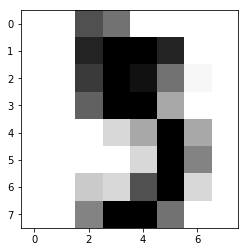

In [17]:
#assign a number from 0 to 1797 to 'dr' to check the model

dr=5 #change number here



ans=np.argmax(vvvv[dr])
x_test = np.array(testdata)
plot_data = x_test[dr]
plot_data = plot_data.reshape(8,8)
plt.imshow(plot_data,cmap="Greys")
print('the number in the image is:',ans)  

In [18]:
bhj=np.array(traintargets)
bhj.shape

(3823,)

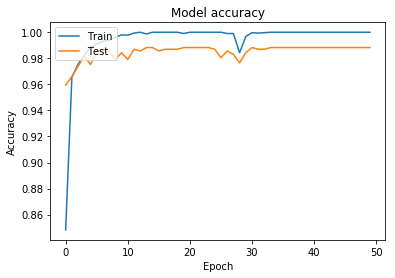

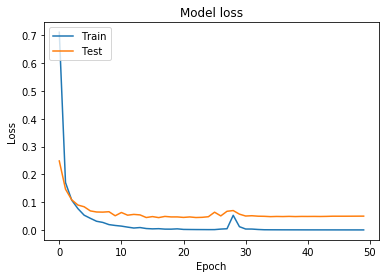

In [19]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
def decode(datum):
    return np.argmax(datum)

  
result_array = np.array([])

for line in range(vvvv.shape[0]):
    result = decode(vvvv[line])
    result_array = np.append(result_array, result)
  

In [0]:
classy=[0,1,2,3,4,5,6,7,8,9]
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt



In [22]:
confusion_matrix(testtargets,result_array)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 181,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   1, 175,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   4, 171,   0,   3,   0,   1,   3,   1],
       [  0,   1,   0,   0, 177,   0,   0,   1,   2,   0],
       [  0,   0,   0,   0,   0, 181,   0,   0,   0,   1],
       [  0,   0,   0,   0,   1,   0, 180,   0,   0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 167,   1,   6],
       [  0,   6,   0,   0,   0,   2,   0,   0, 163,   3],
       [  0,   0,   0,   1,   0,   2,   0,   0,   2, 175]])